# Model Automl - Breast Cancer

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca AutoML Pycaret
from pycaret.classification import *

# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark -a "Verções bibliotecas" --iversions

import warnings
warnings.filterwarnings("ignore")

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.15


In [4]:
data = pd.read_csv("data.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [5]:
# Visualizando os 5 primeiros dados
data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [6]:
# Visualizando os 5 últimos dados
data.tail(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN

In [7]:
# Visualizando linhas e colunas
data.shape

(569, 33)

In [8]:
# Informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Tipo dados
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Amostra simples 5 
data.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
458  9112594         B        13.00         25.13           82.61      520.2   
207   879830         M        17.01         20.26          109.70      904.3   
197   877159         M        18.08         21.84          117.40     1024.0   
522    91789         B        11.26         19.83           71.30      388.1   
209  8810436         B        15.27         12.91           98.17      725.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
458          0.08369           0.05073        0.012060             0.017620   
207          0.08772           0.07304        0.069500             0.053900   
197          0.07371           0.08642        0.110300             0.057780   
522          0.08511           0.04413        0.005067             0.005664   
209          0.08182           0.06230        0.058920             0.031570   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
458         0.1667                 0.05449     0.2621      1.2320   
207         0.2026                 0.05223     0.5858      0.8554   
197         0.1770                 0.05340     0.6362      1.3050   
522         0.1637                 0.06343     0.1344      1.0830   
209         0.1359                 0.05526     0.2134      0.3628   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
458        1.6570   21.190       0.006054        0.008974      0.005681   
207        4.1060   68.460       0.005038        0.015030      0.019460   
197        4.3120   76.360       0.005530        0.052960      0.061100   
522        0.9812    9.332       0.004200        0.005900      0.003846   
209        1.5250   20.000       0.004291        0.012360      0.018410   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
458           0.006336     0.012150              0.001514         14.34   
207           0.011230     0.022940              0.002581         19.80   
197           0.014440     0.021400              0.005036         19.76   
522           0.004065     0.014870              0.002295         11.93   
209           0.007373     0.009539              0.001656         17.38   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
458          31.88            91.06       628.5           0.12180   
207          25.05           130.00      1210.0           0.11110   
197          24.70           129.10      1228.0           0.08822   
522          26.43            76.38       435.9           0.11080   
209          15.92           113.70       932.7           0.12220   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
458            0.10930          0.04462               0.05921          0.2306   
207            0.14860          0.19320               0.10960          0.3275   
197            0.19630          0.25350               0.09181          0.2369   
522            0.07723          0.02533               0.02832          0.2557   
209            0.21860          0.29620               0.10350          0.2320   

     fractal_dimension_worst  Unnamed: 32  
458                  0.06291          NaN  
207                  0.06469          NaN  
197                  0.06558          NaN  
522                  0.07613          NaN  
209                  0.07474          NaN

In [11]:
# Colunas númericas
nub = ["perimeter_mean", 
       "area_mean", 
       "smoothness_mean", 
       "compactness_mean", 
       "concavity_mean",
       "concave points_mean", 
       "symmetry_mean", 
       "fractal_dimension_mean", 
       "radius_se", 
       "perimeter_se",
       "area_se",
       "smoothness_se"]

# Coluna target
target = ["diagnosis"]

In [12]:
# Total
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
# Variavel target
target = ["diagnosis"]

# Explorando as variáveis númericas

In [14]:
# Resumo variáveis numéricas
data[nub].describe()

perimeter_mean    area_mean  smoothness_mean  compactness_mean  \
count      569.000000   569.000000       569.000000        569.000000   
mean        91.969033   654.889104         0.096360          0.104341   
std         24.298981   351.914129         0.014064          0.052813   
min         43.790000   143.500000         0.052630          0.019380   
25%         75.170000   420.300000         0.086370          0.064920   
50%         86.240000   551.100000         0.095870          0.092630   
75%        104.100000   782.700000         0.105300          0.130400   
max        188.500000  2501.000000         0.163400          0.345400   

       concavity_mean  concave points_mean  symmetry_mean  \
count      569.000000           569.000000     569.000000   
mean         0.088799             0.048919       0.181162   
std          0.079720             0.038803       0.027414   
min          0.000000             0.000000       0.106000   
25%          0.029560             0.020310       0.161900   
50%          0.061540             0.033500       0.179200   
75%          0.130700             0.074000       0.195700   
max          0.426800             0.201200       0.304000   

       fractal_dimension_mean   radius_se  perimeter_se     area_se  \
count              569.000000  569.000000    569.000000  569.000000   
mean                 0.062798    0.405172      2.866059   40.337079   
std                  0.007060    0.277313      2.021855   45.491006   
min                  0.049960    0.111500      0.757000    6.802000   
25%                  0.057700    0.232400      1.606000   17.850000   
50%                  0.061540    0.324200      2.287000   24.530000   
75%                  0.066120    0.478900      3.357000   45.190000   
max                  0.097440    2.873000     21.980000  542.200000   

       smoothness_se  
count     569.000000  
mean        0.007041  
std         0.003003  
min         0.001713  
25%         0.005169  
50%         0.006380  
75%         0.008146  
max         0.031130

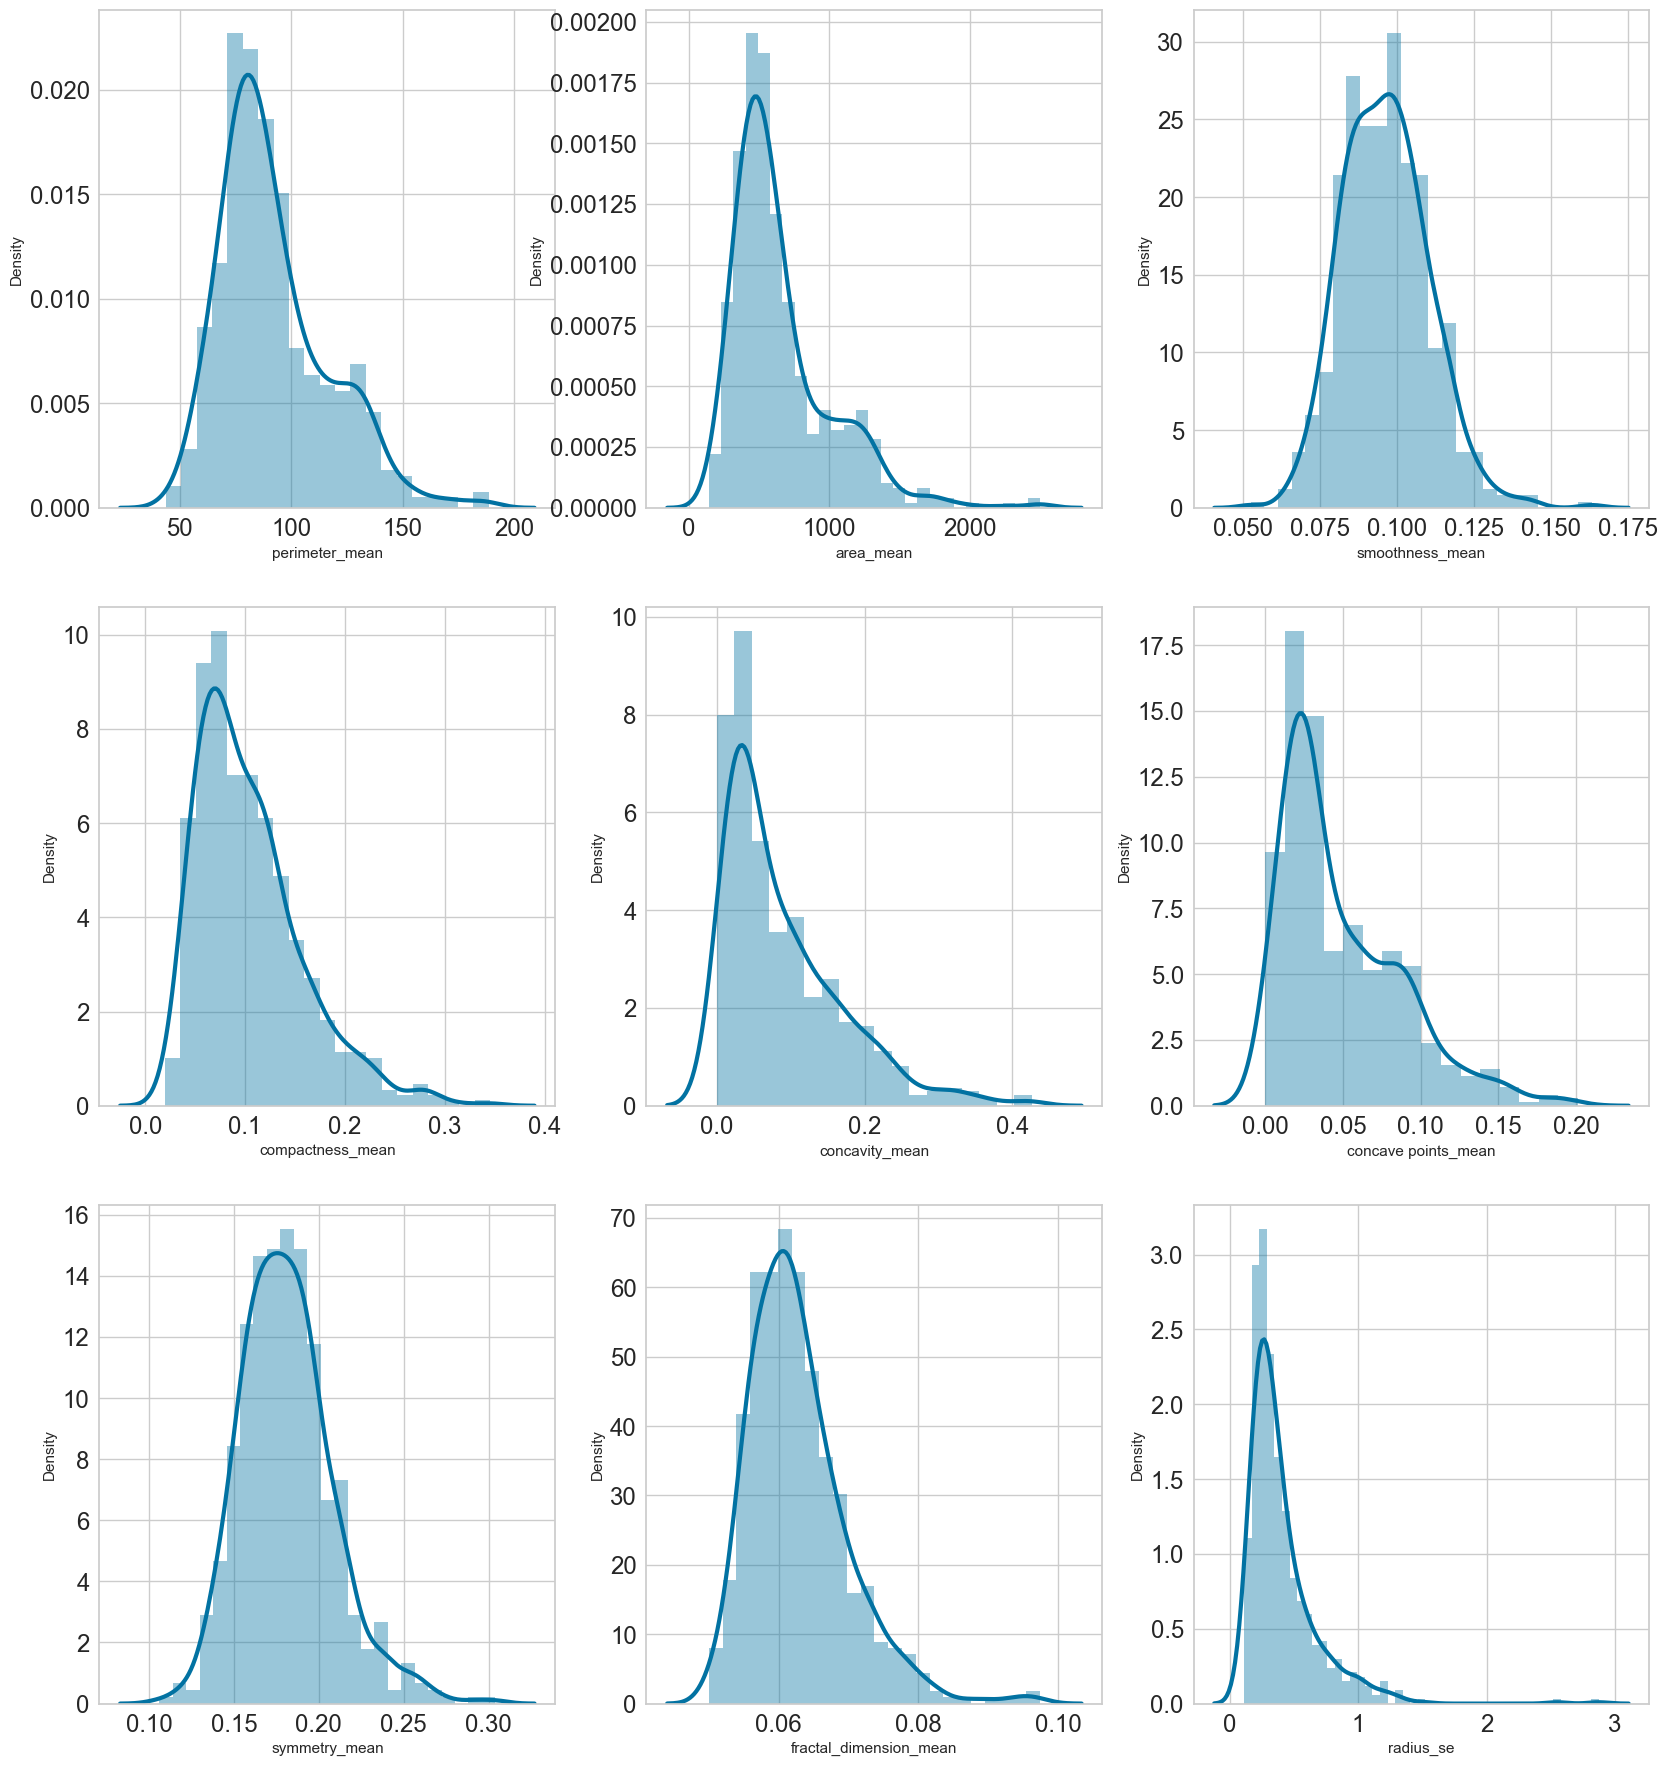

In [15]:
fig , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20, 22))

ax = sns.distplot(data["perimeter_mean"] , ax=axes[0, 0])
ax = sns.distplot(data["area_mean"] ,  ax=axes[0, 1])
ax = sns.distplot(data["smoothness_mean"] , ax=axes[0, 2])
ax = sns.distplot(data["compactness_mean"], ax=axes[1, 0] )
ax = sns.distplot(data["concavity_mean"] , ax=axes[1, 1] )
ax = sns.distplot(data["concave points_mean"] , ax=axes[1, 2] )
ax = sns.distplot(data["symmetry_mean"] , ax=axes[2, 0])
ax = sns.distplot(data["fractal_dimension_mean"], ax=axes[2, 1])
ax = sns.distplot(data["radius_se"], ax=axes[2, 2])


plt.show()

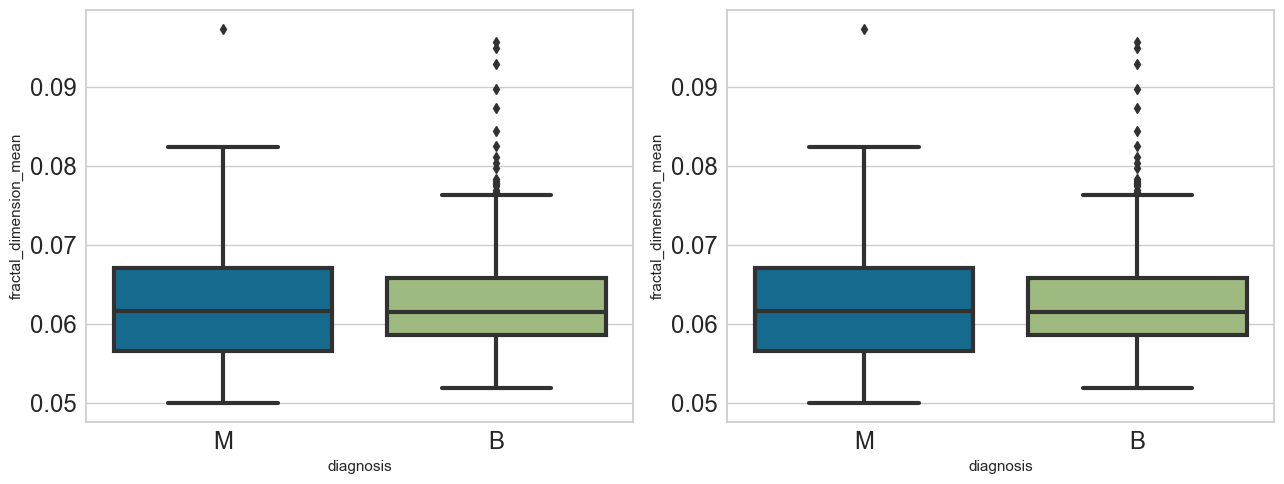

In [16]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
sns.boxplot(y=data['fractal_dimension_mean'],x=data['diagnosis'],ax=ax[0])
sns.boxplot(y=data['fractal_dimension_mean'],x=data['diagnosis'],ax=ax[1])
plt.tight_layout()

In [17]:
# Correlação das colunas númericas
data[nub].corr()

perimeter_mean  area_mean  smoothness_mean  \
perimeter_mean                1.000000   0.986507         0.207278   
area_mean                     0.986507   1.000000         0.177028   
smoothness_mean               0.207278   0.177028         1.000000   
compactness_mean              0.556936   0.498502         0.659123   
concavity_mean                0.716136   0.685983         0.521984   
concave points_mean           0.850977   0.823269         0.553695   
symmetry_mean                 0.183027   0.151293         0.557775   
fractal_dimension_mean       -0.261477  -0.283110         0.584792   
radius_se                     0.691765   0.732562         0.301467   
perimeter_se                  0.693135   0.726628         0.296092   
area_se                       0.744983   0.800086         0.246552   
smoothness_se                -0.202694  -0.166777         0.332375   

                        compactness_mean  concavity_mean  concave points_mean  \
perimeter_mean                  0.556936        0.716136             0.850977   
area_mean                       0.498502        0.685983             0.823269   
smoothness_mean                 0.659123        0.521984             0.553695   
compactness_mean                1.000000        0.883121             0.831135   
concavity_mean                  0.883121        1.000000             0.921391   
concave points_mean             0.831135        0.921391             1.000000   
symmetry_mean                   0.602641        0.500667             0.462497   
fractal_dimension_mean          0.565369        0.336783             0.166917   
radius_se                       0.497473        0.631925             0.698050   
perimeter_se                    0.548905        0.660391             0.710650   
area_se                         0.455653        0.617427             0.690299   
smoothness_se                   0.135299        0.098564             0.027653   

                        symmetry_mean  fractal_dimension_mean  radius_se  \
perimeter_mean               0.183027               -0.261477   0.691765   
area_mean                    0.151293               -0.283110   0.732562   
smoothness_mean              0.557775                0.584792   0.301467   
compactness_mean             0.602641                0.565369   0.497473   
concavity_mean               0.500667                0.336783   0.631925   
concave points_mean          0.462497                0.166917   0.698050   
symmetry_mean                1.000000                0.479921   0.303379   
fractal_dimension_mean       0.479921                1.000000   0.000111   
radius_se                    0.303379                0.000111   1.000000   
perimeter_se                 0.313893                0.039830   0.972794   
area_se                      0.223970               -0.090170   0.951830   
smoothness_se                0.187321                0.401964   0.164514   

                        perimeter_se   area_se  smoothness_se  
perimeter_mean              0.693135  0.744983      -0.202694  
area_mean                   0.726628  0.800086      -0.166777  
smoothness_mean             0.296092  0.246552       0.332375  
compactness_mean            0.548905  0.455653       0.135299  
concavity_mean              0.660391  0.617427       0.098564  
concave points_mean         0.710650  0.690299       0.027653  
symmetry_mean               0.313893  0.223970       0.187321  
fractal_dimension_mean      0.039830 -0.090170       0.401964  
radius_se                   0.972794  0.951830       0.164514  
perimeter_se                1.000000  0.937655       0.151075  
area_se                     0.937655  1.000000       0.075150  
smoothness_se               0.151075  0.075150       1.000000

In [18]:
# Correlação
data_corr = data[nub].corr()
data_corr

perimeter_mean  area_mean  smoothness_mean  \
perimeter_mean                1.000000   0.986507         0.207278   
area_mean                     0.986507   1.000000         0.177028   
smoothness_mean               0.207278   0.177028         1.000000   
compactness_mean              0.556936   0.498502         0.659123   
concavity_mean                0.716136   0.685983         0.521984   
concave points_mean           0.850977   0.823269         0.553695   
symmetry_mean                 0.183027   0.151293         0.557775   
fractal_dimension_mean       -0.261477  -0.283110         0.584792   
radius_se                     0.691765   0.732562         0.301467   
perimeter_se                  0.693135   0.726628         0.296092   
area_se                       0.744983   0.800086         0.246552   
smoothness_se                -0.202694  -0.166777         0.332375   

                        compactness_mean  concavity_mean  concave points_mean  \
perimeter_mean                  0.556936        0.716136             0.850977   
area_mean                       0.498502        0.685983             0.823269   
smoothness_mean                 0.659123        0.521984             0.553695   
compactness_mean                1.000000        0.883121             0.831135   
concavity_mean                  0.883121        1.000000             0.921391   
concave points_mean             0.831135        0.921391             1.000000   
symmetry_mean                   0.602641        0.500667             0.462497   
fractal_dimension_mean          0.565369        0.336783             0.166917   
radius_se                       0.497473        0.631925             0.698050   
perimeter_se                    0.548905        0.660391             0.710650   
area_se                         0.455653        0.617427             0.690299   
smoothness_se                   0.135299        0.098564             0.027653   

                        symmetry_mean  fractal_dimension_mean  radius_se  \
perimeter_mean               0.183027               -0.261477   0.691765   
area_mean                    0.151293               -0.283110   0.732562   
smoothness_mean              0.557775                0.584792   0.301467   
compactness_mean             0.602641                0.565369   0.497473   
concavity_mean               0.500667                0.336783   0.631925   
concave points_mean          0.462497                0.166917   0.698050   
symmetry_mean                1.000000                0.479921   0.303379   
fractal_dimension_mean       0.479921                1.000000   0.000111   
radius_se                    0.303379                0.000111   1.000000   
perimeter_se                 0.313893                0.039830   0.972794   
area_se                      0.223970               -0.090170   0.951830   
smoothness_se                0.187321                0.401964   0.164514   

                        perimeter_se   area_se  smoothness_se  
perimeter_mean              0.693135  0.744983      -0.202694  
area_mean                   0.726628  0.800086      -0.166777  
smoothness_mean             0.296092  0.246552       0.332375  
compactness_mean            0.548905  0.455653       0.135299  
concavity_mean              0.660391  0.617427       0.098564  
concave points_mean         0.710650  0.690299       0.027653  
symmetry_mean               0.313893  0.223970       0.187321  
fractal_dimension_mean      0.039830 -0.090170       0.401964  
radius_se                   0.972794  0.951830       0.164514  
perimeter_se                1.000000  0.937655       0.151075  
area_se                     0.937655  1.000000       0.075150  
smoothness_se               0.151075  0.075150       1.000000

<AxesSubplot: >

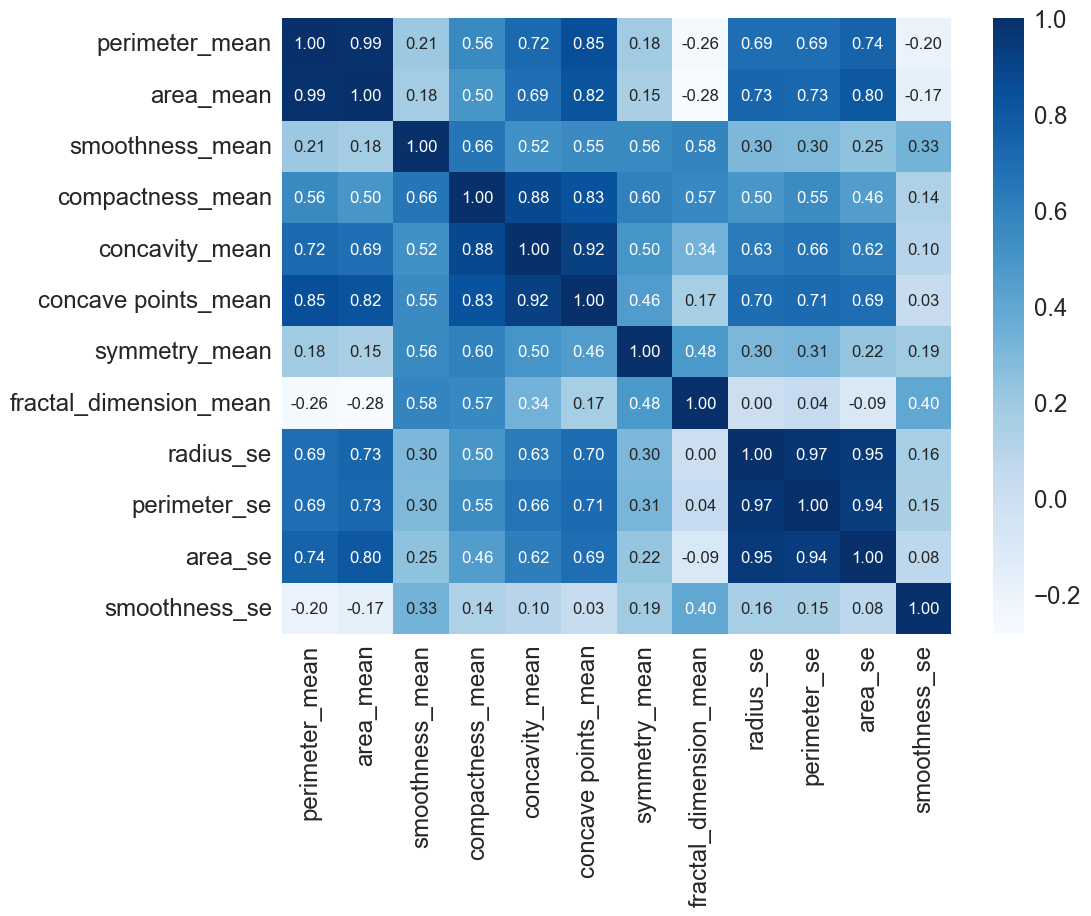

In [19]:
# Gráfico
plt.figure(figsize = (10.8, 8))
sns.heatmap(data_corr, cmap = 'Blues', annot = True, fmt = '.2f')

<Figure size 1500x1500 with 0 Axes>

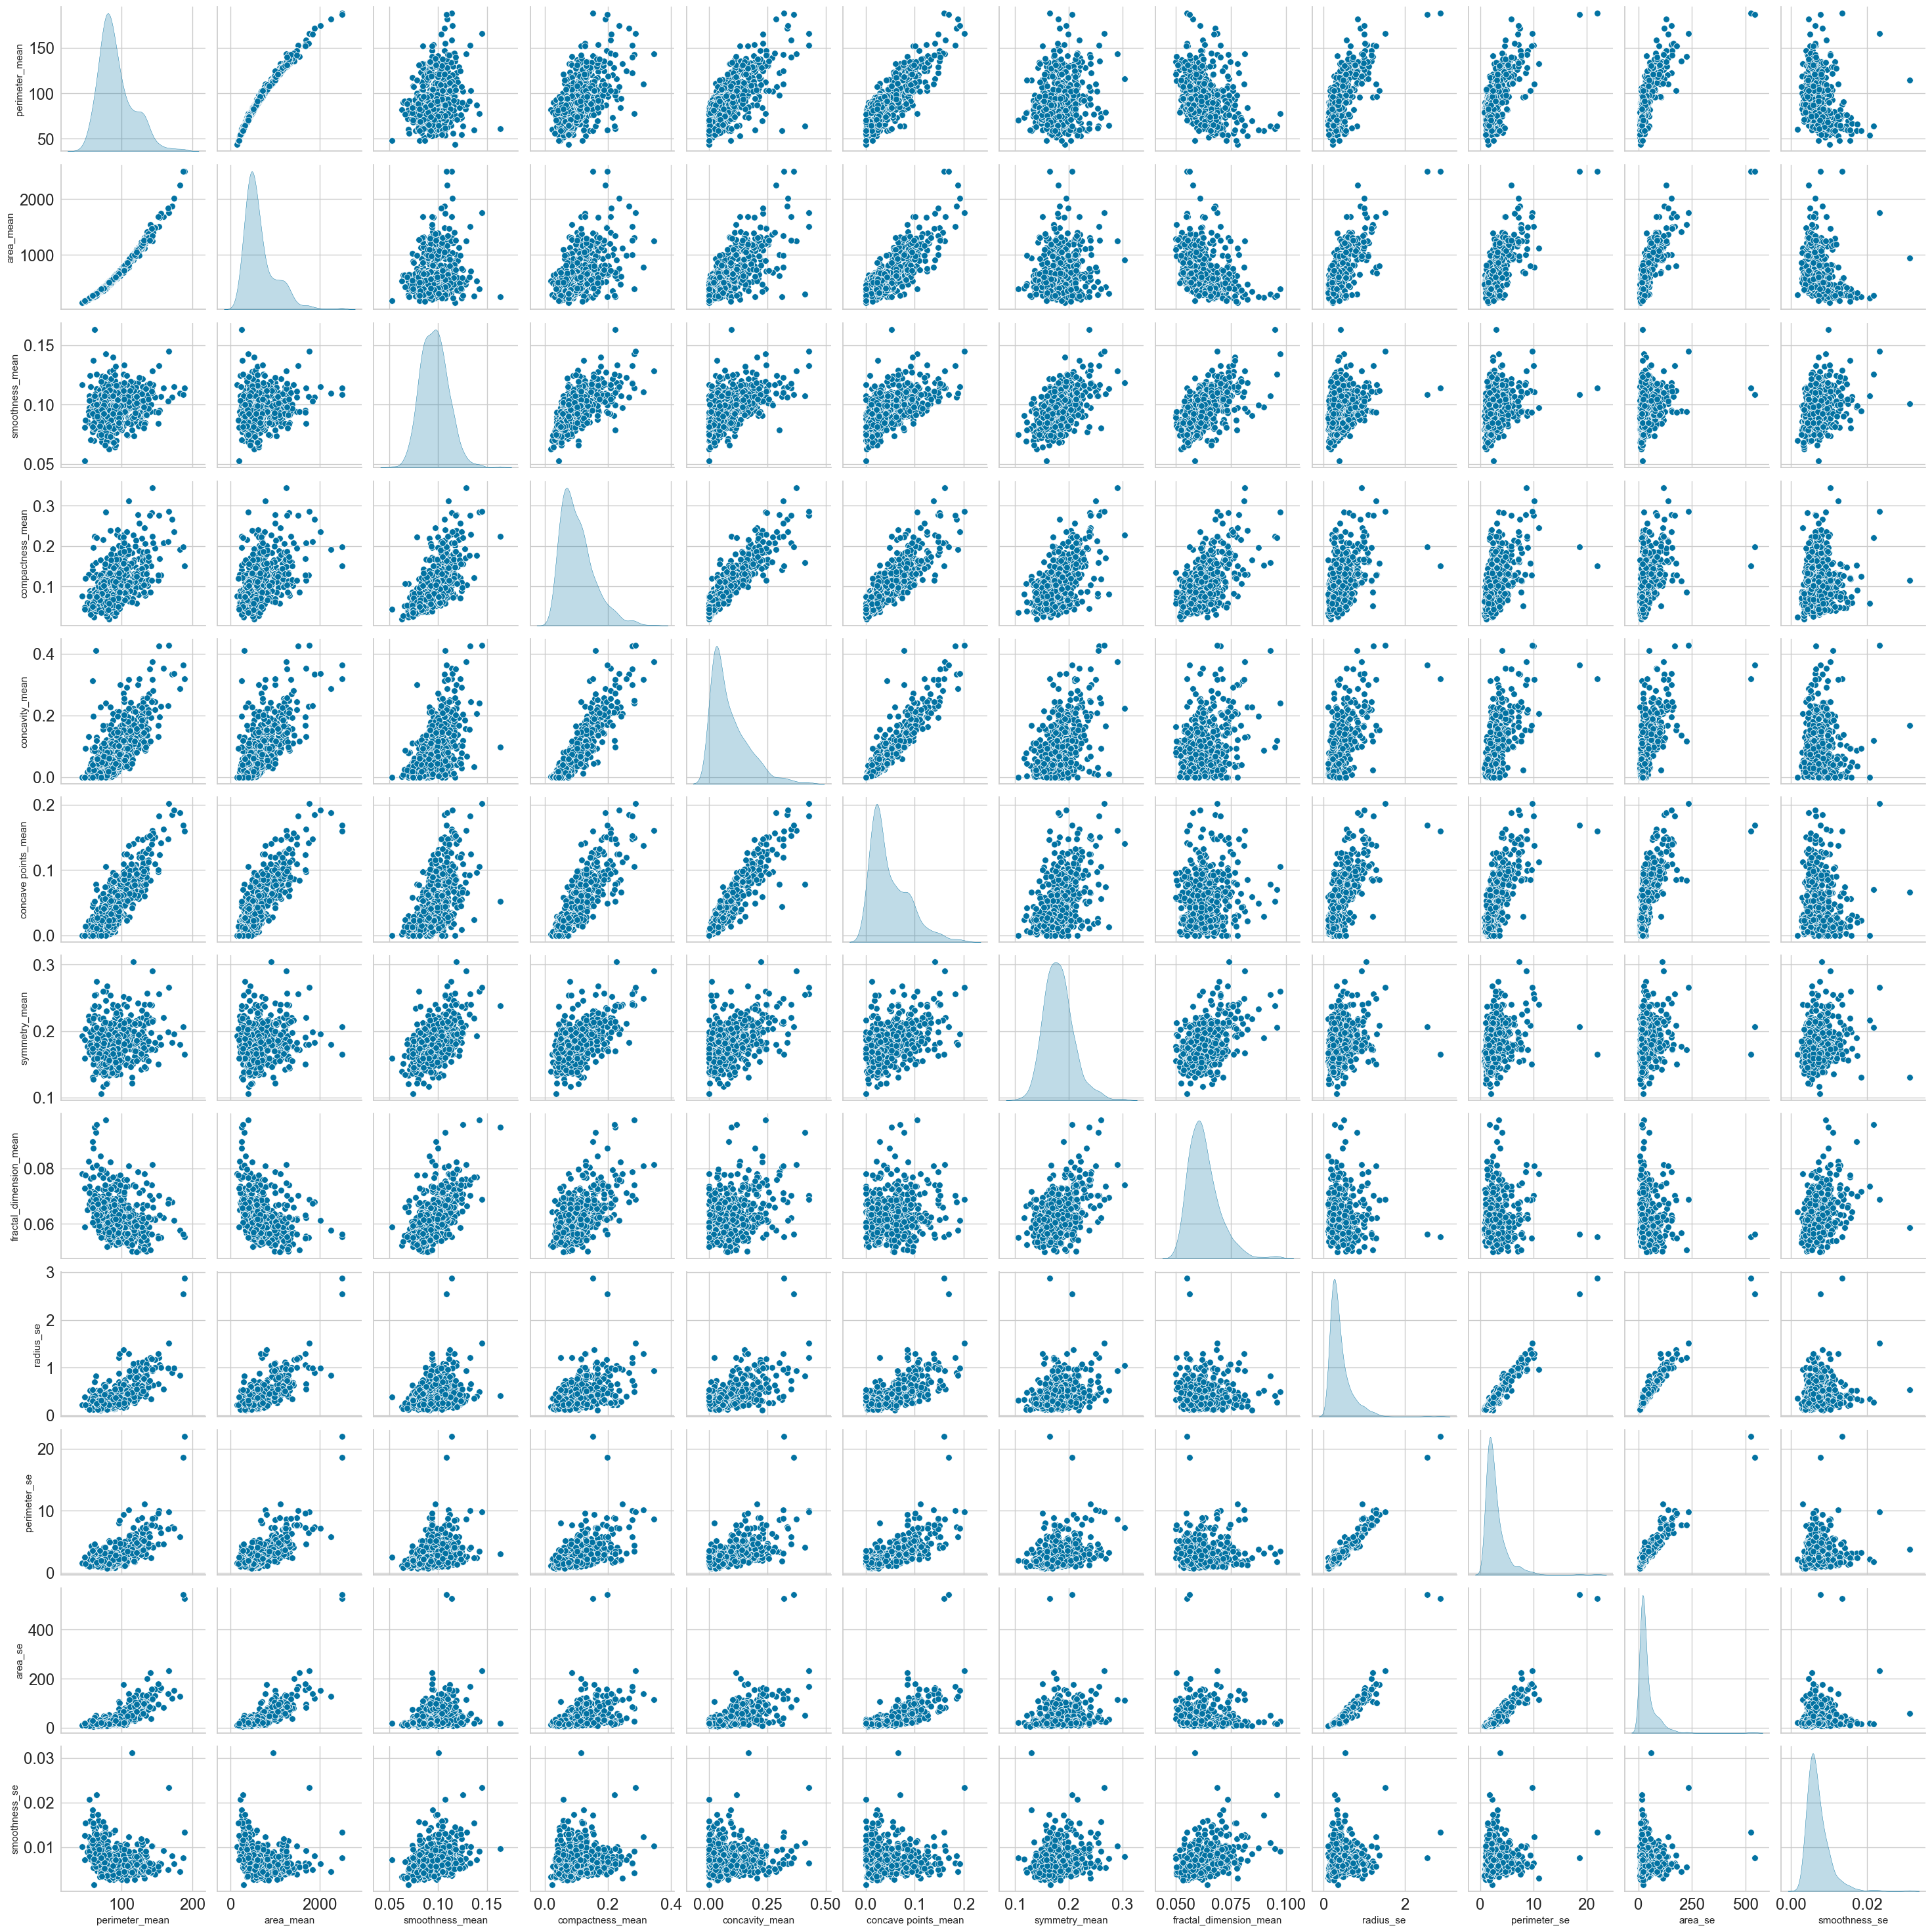

In [20]:
plt.figure(figsize = (15, 15))
sns.pairplot(data[nub], diag_kind = 'kde')

# Modelo AutoML

In [32]:
# Nessa função ele cria o pipeline transformação modelo 
# Segunda parte setup deve ser chamada antes de executar para função.

# Model
# Raiz da base dados
model = setup(data = data,
      # Features target
      target = "diagnosis",

      # Os valores ausentes em recursos numéricos são imputados com o valor 'médio' do recurso no conjunto de dados de treinamento. 
      # A outra opção disponível é 'mediana' ou 'zero'.
      numeric_imputation = 'mean',

      # Controla a entrada de confirmação de tipos de dados quando setupé executado. 
      # Ao executar em modo totalmente automatizado ou em um kernel remoto, deve ser True.
      silent = True)

In [33]:
# Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada. 
# A saída dessa função é uma grade de pontuação com pontuações médias de validação cruzada. 
# As métricas avaliadas durante o CV podem ser acessadas usando a função get_metrics. 
# As métricas personalizadas podem ser adicionadas ou removidas usando as funções add_metric e remove_metric.
compare_models()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7668, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
gbc = create_model('gbc')

In [35]:
Random_Forest = create_model('rf')

In [36]:
Tuned_Random_Forest = tune_model(Random_Forest)

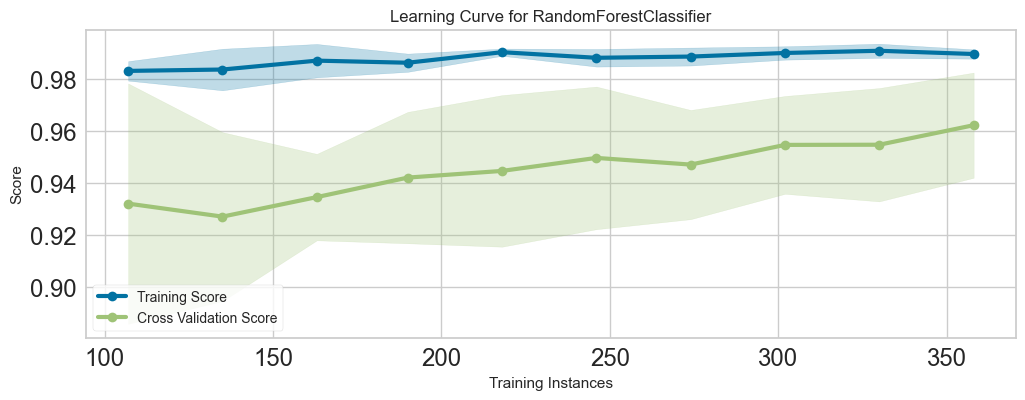

In [37]:
plot_model(estimator = Tuned_Random_Forest, plot = 'learning')

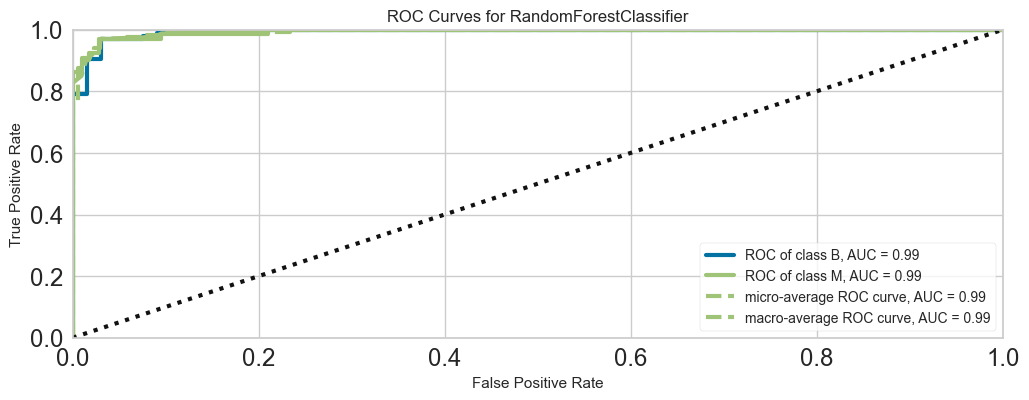

In [38]:
plot_model(estimator = Tuned_Random_Forest, plot = 'auc')

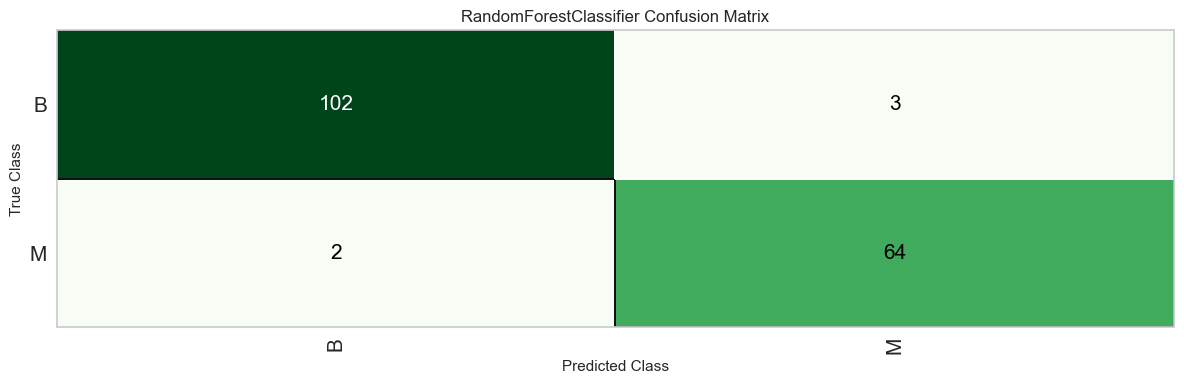

In [39]:
plot_model(estimator = Tuned_Random_Forest, plot = 'confusion_matrix')

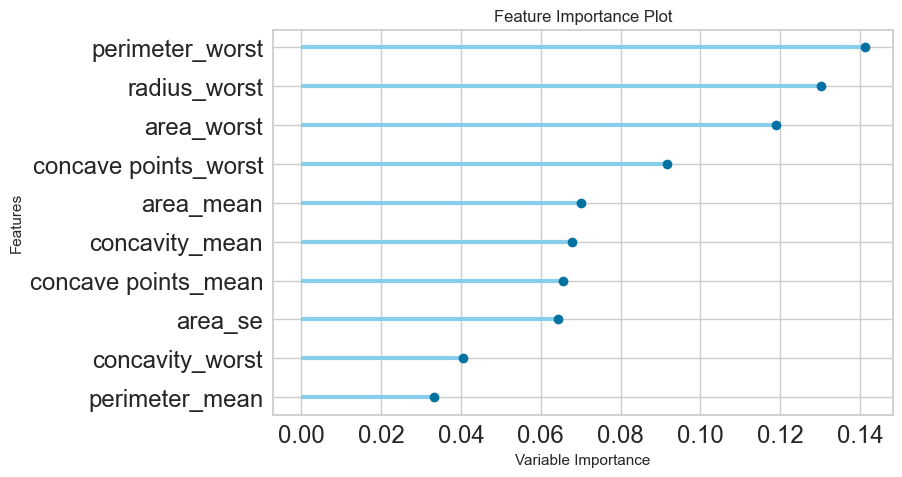

In [40]:
plot_model( estimator = Tuned_Random_Forest, plot = 'feature')

In [41]:
evaluate_model(Tuned_Random_Forest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

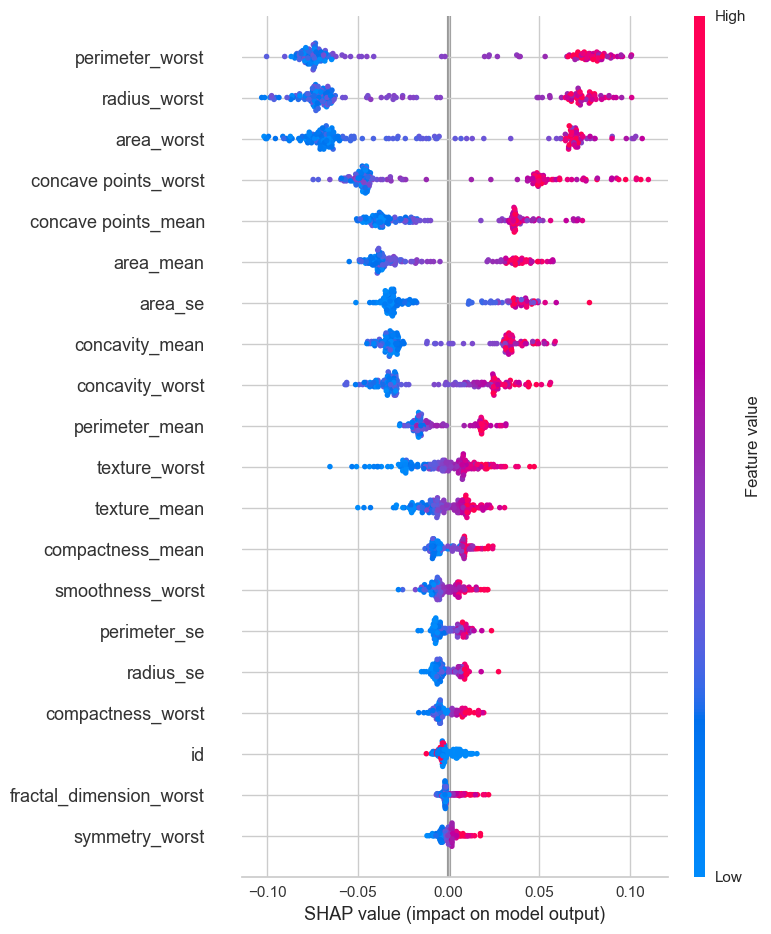

In [42]:
interpret_model( Tuned_Random_Forest )

# Modelo 02 - AutoML

In [21]:
# Modelo automl 2
model = setup(data, 
             target = "diagnosis",
             session_id = 123, 
             log_experiment = True, 
             numeric_imputation = 'mean',
             silent = True)

2023/01/15 20:17:13 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [22]:
# Modelos melhores
model = compare_models()

In [47]:
# Modelo Light Gradient Boosting Machine
lightgbm = create_model('lightgbm')

In [48]:
# Model Gradient Boosting Classifier
gbc = create_model('gbc')

In [49]:
# Model Ada Boost Classifier
ada = create_model('ada', fold = 10)

In [50]:
# Tuned dos modelos

model_tuned_lr = tune_model(lightgbm)
model_tuned_rf = tune_model(gbc)
model_bagged_dt = ensemble_model(ada)

In [51]:
# Previsão do modelo Light Gradient Boosting Machine
model_pred_lr = predict_model(lightgbm)
model_pred_lr.head()

id  radius_mean  texture_mean    area_mean  smoothness_mean  \
0   897137.0    11.250000     14.780000   390.000000          0.08306   
1  8910996.0     9.742000     15.670000   289.899994          0.09037   
2   877989.0    17.540001     19.320000   951.599976          0.08968   
3   873357.0    13.010000     22.219999   526.400024          0.06251   
4  8612399.0    18.459999     18.520000  1075.000000          0.09874   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.04458        0.000974             0.002941         0.1773   
1           0.04689        0.011030             0.014070         0.2081   
2           0.11980        0.103600             0.074880         0.1506   
3           0.01938        0.001595             0.001852         0.1395   
4           0.10530        0.133500             0.087950         0.2132   

   fractal_dimension_mean  ...   area_worst  smoothness_worst  \
0                 0.06081  ...   492.700012           0.11660   
1                 0.06312  ...   355.200012           0.14670   
2                 0.05491  ...  1239.000000           0.13810   
3                 0.05234  ...   608.799988           0.08125   
4                 0.06022  ...  1603.000000           0.13980   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0            0.09794         0.005518              0.016670          0.2815   
1            0.09370         0.040430              0.051590          0.2841   
2            0.34200         0.350800              0.193900          0.2928   
3            0.03432         0.007977              0.009259          0.2295   
4            0.20890         0.315700              0.164200          0.3695   

   fractal_dimension_worst  diagnosis  Label   Score  
0                  0.07418          B      B  1.0000  
1                  0.08175          B      B  1.0000  
2                  0.07867          M      M  0.9998  
3                  0.05843          B      B  0.9994  
4                  0.08579          M      M  1.0000  

[5 rows x 33 columns]

In [52]:
# Previsão do modelo Gradient Boosting Classifier
model_pred_dt = predict_model(gbc)
model_pred_dt.head()

id  radius_mean  texture_mean    area_mean  smoothness_mean  \
0   897137.0    11.250000     14.780000   390.000000          0.08306   
1  8910996.0     9.742000     15.670000   289.899994          0.09037   
2   877989.0    17.540001     19.320000   951.599976          0.08968   
3   873357.0    13.010000     22.219999   526.400024          0.06251   
4  8612399.0    18.459999     18.520000  1075.000000          0.09874   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.04458        0.000974             0.002941         0.1773   
1           0.04689        0.011030             0.014070         0.2081   
2           0.11980        0.103600             0.074880         0.1506   
3           0.01938        0.001595             0.001852         0.1395   
4           0.10530        0.133500             0.087950         0.2132   

   fractal_dimension_mean  ...   area_worst  smoothness_worst  \
0                 0.06081  ...   492.700012           0.11660   
1                 0.06312  ...   355.200012           0.14670   
2                 0.05491  ...  1239.000000           0.13810   
3                 0.05234  ...   608.799988           0.08125   
4                 0.06022  ...  1603.000000           0.13980   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0            0.09794         0.005518              0.016670          0.2815   
1            0.09370         0.040430              0.051590          0.2841   
2            0.34200         0.350800              0.193900          0.2928   
3            0.03432         0.007977              0.009259          0.2295   
4            0.20890         0.315700              0.164200          0.3695   

   fractal_dimension_worst  diagnosis  Label   Score  
0                  0.07418          B      B  0.9997  
1                  0.08175          B      B  0.9996  
2                  0.07867          M      M  0.9996  
3                  0.05843          B      B  0.9984  
4                  0.08579          M      M  0.9996  

[5 rows x 33 columns]

In [53]:
# Previsão do modelo Ada Boost Classifier 
model_pred_rt = predict_model(ada)
model_pred_rt.head()

id  radius_mean  texture_mean    area_mean  smoothness_mean  \
0   897137.0    11.250000     14.780000   390.000000          0.08306   
1  8910996.0     9.742000     15.670000   289.899994          0.09037   
2   877989.0    17.540001     19.320000   951.599976          0.08968   
3   873357.0    13.010000     22.219999   526.400024          0.06251   
4  8612399.0    18.459999     18.520000  1075.000000          0.09874   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.04458        0.000974             0.002941         0.1773   
1           0.04689        0.011030             0.014070         0.2081   
2           0.11980        0.103600             0.074880         0.1506   
3           0.01938        0.001595             0.001852         0.1395   
4           0.10530        0.133500             0.087950         0.2132   

   fractal_dimension_mean  ...   area_worst  smoothness_worst  \
0                 0.06081  ...   492.700012           0.11660   
1                 0.06312  ...   355.200012           0.14670   
2                 0.05491  ...  1239.000000           0.13810   
3                 0.05234  ...   608.799988           0.08125   
4                 0.06022  ...  1603.000000           0.13980   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0            0.09794         0.005518              0.016670          0.2815   
1            0.09370         0.040430              0.051590          0.2841   
2            0.34200         0.350800              0.193900          0.2928   
3            0.03432         0.007977              0.009259          0.2295   
4            0.20890         0.315700              0.164200          0.3695   

   fractal_dimension_worst  diagnosis  Label   Score  
0                  0.07418          B      B  0.7955  
1                  0.08175          B      B  0.7528  
2                  0.07867          M      M  0.7173  
3                  0.05843          B      B  0.7231  
4                  0.08579          M      M  0.6679  

[5 rows x 33 columns]

# Métricas do modelo

In [54]:
# Evaluate modelo Light Gradient Boosting Machine
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
# Evaluate modelo Gradient Boosting Classifier
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:
# Evaluate modelo Ada Boost Classifier
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Curva roc do modelos

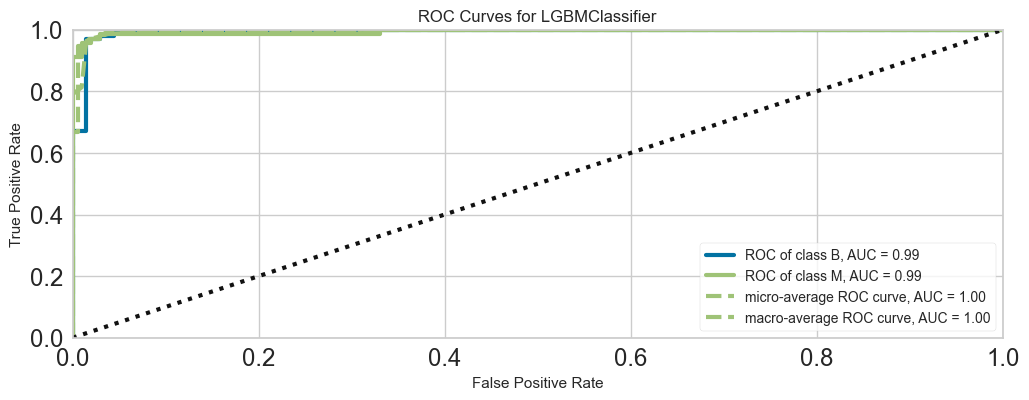

In [57]:
# Curva roc do modelo Light Gradient Boosting Machine
plot_model(lightgbm)

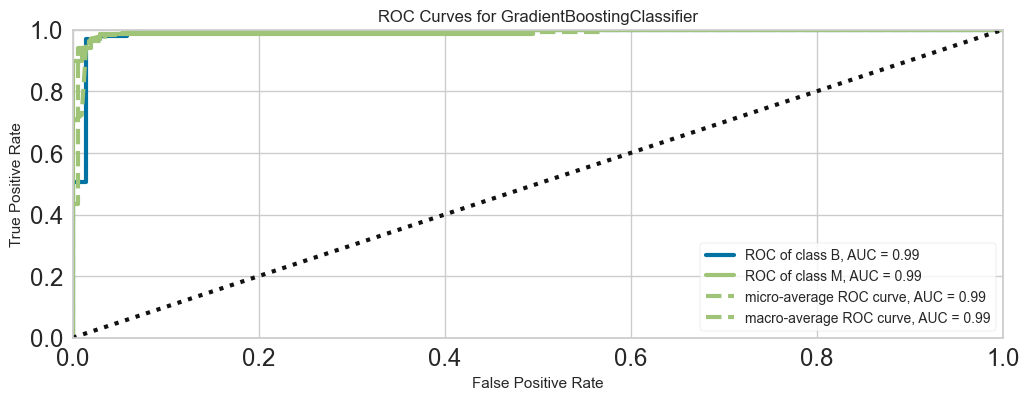

In [58]:
# Curva roc do modelo Gradient Boosting Classifier 
plot_model(gbc)

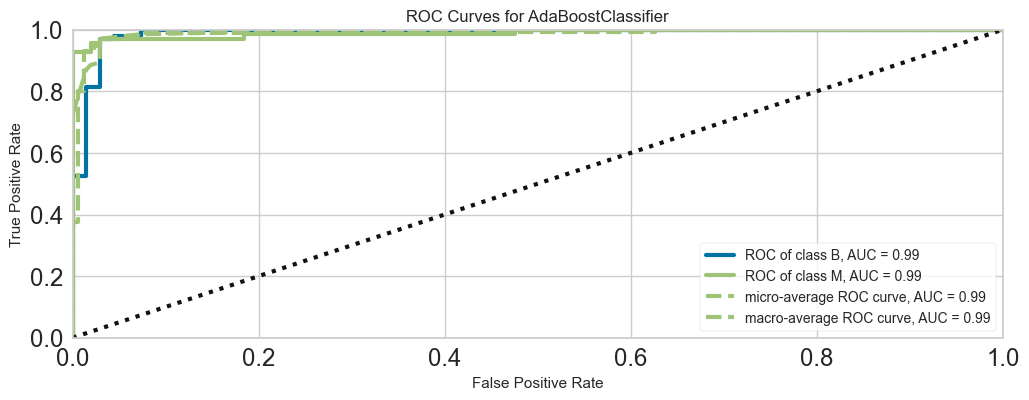

In [59]:
# Curva roc do modelo Ada Boost Classifier
plot_model(ada)

# Confusion matrix

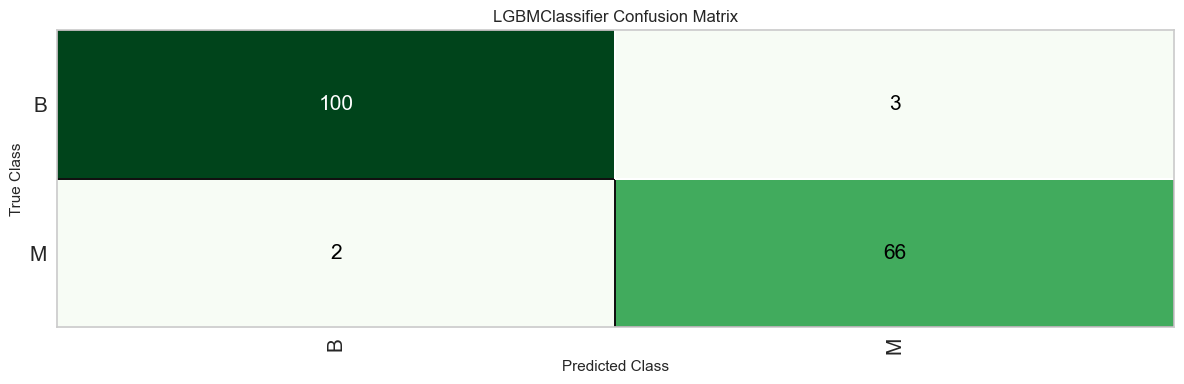

In [60]:
# plot lightgbm - confusion matrix
plot_model(lightgbm, plot = 'confusion_matrix')

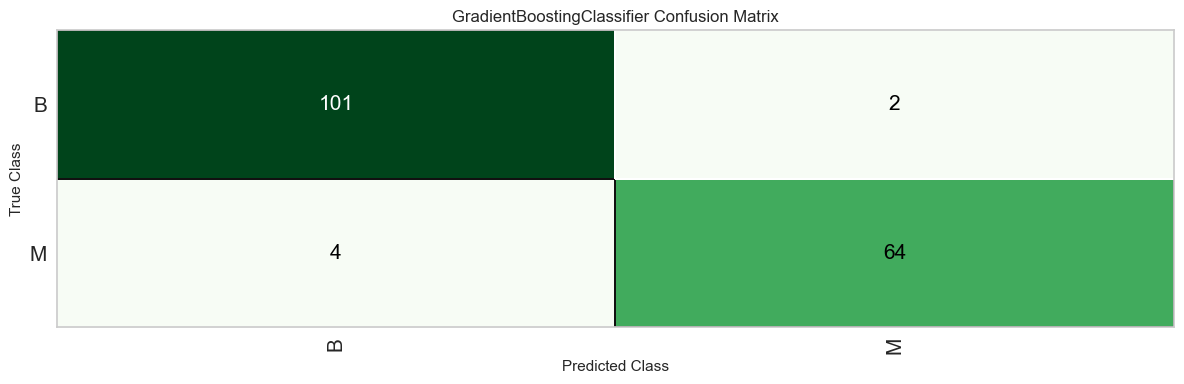

In [61]:
# plot gbc - confusion matrix
plot_model(gbc, plot = 'confusion_matrix')

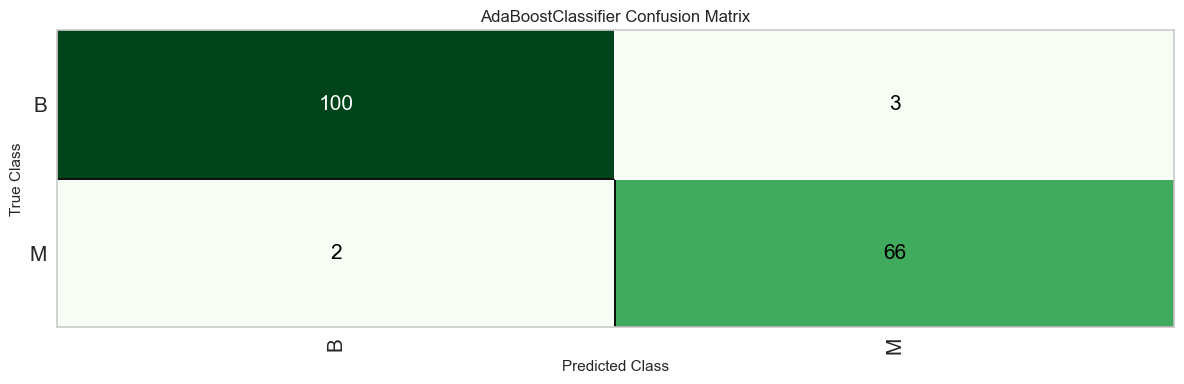

In [62]:
# plot ada - confusion matrix
plot_model(ada, plot = 'confusion_matrix')

# Class report dos modelos

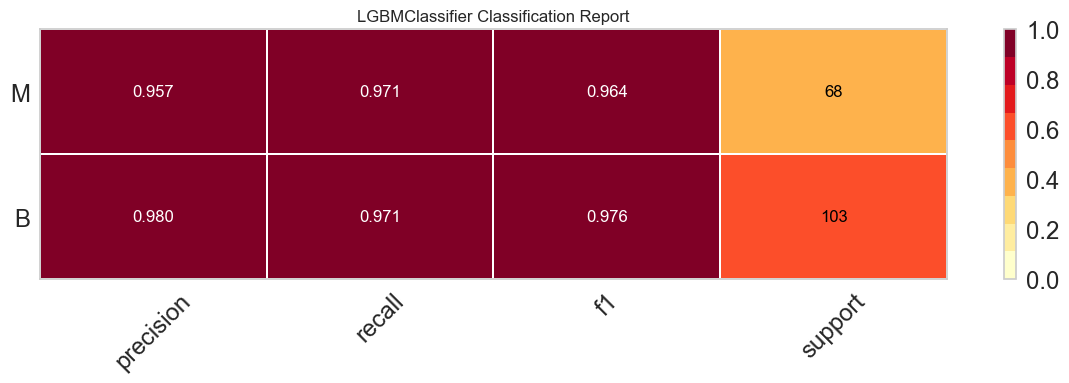

In [63]:
plot_model(lightgbm, plot = 'class_report')

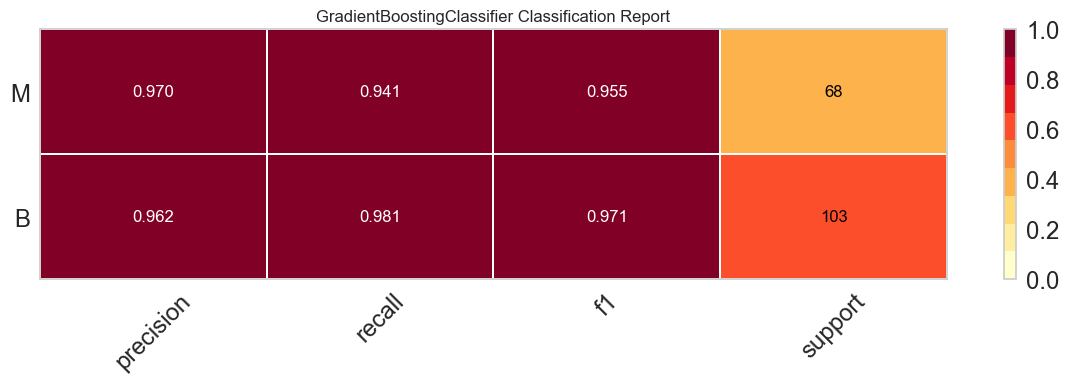

In [64]:
plot_model(gbc, plot = 'class_report')

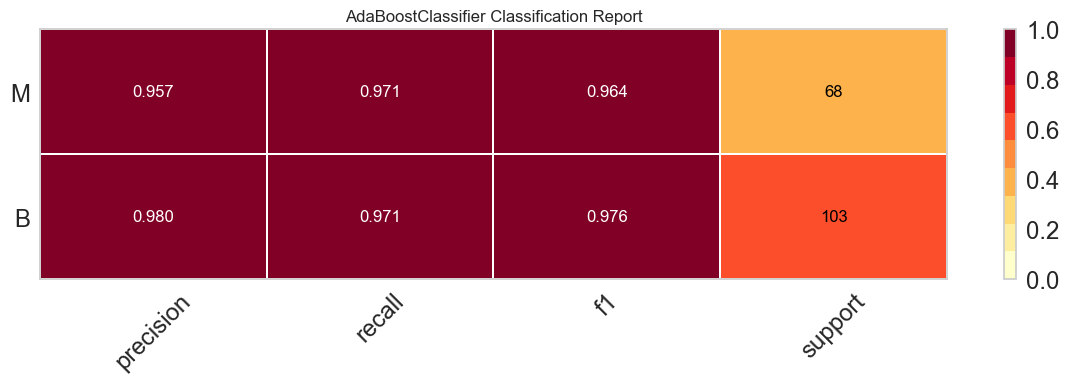

In [65]:
plot_model(ada, plot = 'class_report')

# Salvando modelo

In [67]:
save_model(lightgbm, model_name='best-model')
save_model(gbc, model_name='best-mode2')
save_model(ada, model_name='best-mode3')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                 ('dummy', Dummify(target='diagnosis')),
                 ('fix_perfect', Remove_100(target='diagnosis')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
              

# Conclusão

Nesse modelo de classificação utlizei 3 modelos machine learning são eles regressão logística, random forest, decision tree o melhores modelos foi o regressão logística, random forest, extra trees, K-NN, ridge classifier esse objetivo do modelo e classificar tumores de câncer de mama são classificado por benignos, malignos. O resultado da matriz de confusão do primeiro modelo de regressão logística teve 132 para maligno e 73 para benigno. O modelo teve resultado ótimos no recal acima de 95,9% teve acerto total ou seja o modelo aprendeu muito

Referência
- https://pycaret.org/

- https://github.com/pycaret/pycaret

- https://pycaret.readthedocs.io/en/latest/

- https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763